<a href="https://colab.research.google.com/github/shivendr7/VFD_NOMA/blob/main/VFD_NOMA_Evaluation(HuberDelta)UsingHYPEROPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.losses import MeanSquaredError, CosineSimilarity, MeanAbsoluteError, MeanSquaredLogarithmicError, MeanAbsolutePercentageError, Huber
from keras.optimizers import Adam

In [2]:
!wget 'https://raw.githubusercontent.com/shivendr7/VFD_NOMA/main/Data_P1_100000samples.csv'

--2021-07-08 14:13:31--  https://raw.githubusercontent.com/shivendr7/VFD_NOMA/main/Data_P1_100000samples.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5587697 (5.3M) [text/plain]
Saving to: ‘Data_P1_100000samples.csv’

Data_P1_100000sampl 100%[===================>]   5.33M  29.0MB/s    in 0.2s    

2021-07-08 14:13:31 (29.0 MB/s) - ‘Data_P1_100000samples.csv’ saved [5587697/5587697]



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
df=pd.read_csv('Data_P1_100000samples.csv')
X=np.array(df[df.columns[:9]])
y=np.array(df[df.columns[-1]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)
X_train.shape, y_test.shape

((67000, 9), (33000,))

In [36]:
def create_model(delta=6):
  mape=MeanAbsolutePercentageError()
  model=Sequential()
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_shape=(9,), kernel_regularizer='l2'))
  #model.add(Dropout(0.08))
  #model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer='l2')) #-0
  #model.add(Dropout(0.04))
  #model.add(BatchNormalization())
  model.add(Dense(64, activation='relu', kernel_initializer='he_uniform', kernel_regularizer='l2'))
  model.add(Dropout(0.02))
  #model.add(BatchNormalization())
  model.add(Dense(64, activation='relu', kernel_initializer='he_uniform', kernel_regularizer='l2'))
  #model.add(Dropout(0.04))
  model.add(BatchNormalization())  
  model.add(Dense(32, activation='relu', kernel_initializer='he_uniform', kernel_regularizer='l2'))
  model.add(Dropout(0.02))
  #model.add(BatchNormalization())
  model.add(Dense(32, activation='relu', kernel_initializer='he_uniform', kernel_regularizer='l2'))
  #model.add(Dropout(0.02))
  #model.add(BatchNormalization())
  model.add(Dense(1))
  h_loss=Huber(delta=delta)
  model.compile(loss=[mape, h_loss], optimizer=Adam(learning_rate=0.001))
  return model

In [37]:
model=create_model()

In [38]:
training=model.fit(X_train, y_train, verbose=2, batch_size=25, epochs=50, validation_split=0.3)

Epoch 1/50
1876/1876 - 5s - loss: 1279.7838 - val_loss: 144.9891
Epoch 2/50
1876/1876 - 4s - loss: 132.0599 - val_loss: 101.4654
Epoch 3/50
1876/1876 - 4s - loss: 92.1797 - val_loss: 86.5449
Epoch 4/50
1876/1876 - 4s - loss: 79.1311 - val_loss: 73.6340
Epoch 5/50
1876/1876 - 4s - loss: 75.3704 - val_loss: 90.6809
Epoch 6/50
1876/1876 - 4s - loss: 70.1644 - val_loss: 59.4679
Epoch 7/50
1876/1876 - 4s - loss: 66.2588 - val_loss: 51.8522
Epoch 8/50
1876/1876 - 4s - loss: 60.2440 - val_loss: 67.7781
Epoch 9/50
1876/1876 - 4s - loss: 57.9401 - val_loss: 60.4625
Epoch 10/50
1876/1876 - 4s - loss: 52.3067 - val_loss: 40.3075
Epoch 11/50
1876/1876 - 4s - loss: 51.2582 - val_loss: 47.0884
Epoch 12/50
1876/1876 - 4s - loss: 46.8891 - val_loss: 45.0714
Epoch 13/50
1876/1876 - 4s - loss: 42.9419 - val_loss: 34.5746
Epoch 14/50
1876/1876 - 4s - loss: 41.3525 - val_loss: 43.1076
Epoch 15/50
1876/1876 - 4s - loss: 38.1227 - val_loss: 33.9778
Epoch 16/50
1876/1876 - 4s - loss: 34.8646 - val_loss: 27.9

In [39]:
print('Model Score')
print('mse', MeanSquaredError()(y_test, np.reshape(model.predict(X_test), newshape=(model.predict(X_test).shape[0], ))) )
print('mean absolute error', MeanAbsoluteError()(y_test, np.reshape(model.predict(X_test), newshape=(model.predict(X_test).shape[0], ))) )
print('mean absolute percentage error(MAIN)', MeanAbsolutePercentageError()(y_test, np.reshape(model.predict(X_test), newshape=(model.predict(X_test).shape[0], ))) )
print('huber loss ', Huber(delta=5.4)(y_test, np.reshape(model.predict(X_test), newshape=(model.predict(X_test).shape[0], ))) )

Model Score
mse tf.Tensor(0.0019968865, shape=(), dtype=float32)
mean absolute error tf.Tensor(0.011070708, shape=(), dtype=float32)
mean absolute percentage error(MAIN) tf.Tensor(12.047572, shape=(), dtype=float32)
huber loss  tf.Tensor(0.0009984432, shape=(), dtype=float32)


In [40]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

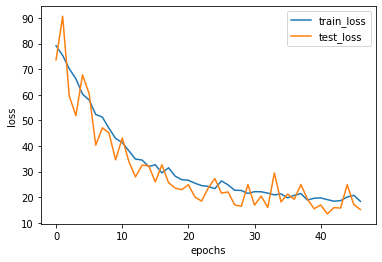

In [48]:
#https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/
train_loss=training.history['loss']
val_loss=training.history['val_loss']
plt.plot(train_loss[3:], label='train_loss')
plt.plot(val_loss[3:], label='test_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

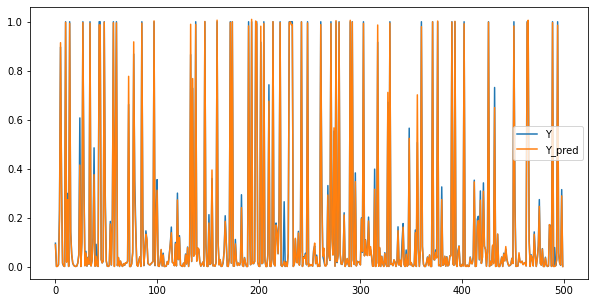

In [49]:
Y=model.predict(X)
plt.figure(figsize=(10, 5)) #put figsize=(20, 10) for a better view
plt.plot(df[df.columns[-1]][:500], label='Y')
plt.plot(Y[:500], label='Y_pred')
plt.legend()
plt.show()

In [11]:
from hyperopt import fmin, tpe, hp, anneal, Trials
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [12]:
y_out=model(X_train)
mape=MeanAbsolutePercentageError()
loss=mape
print(y_out.shape)
y_train_new=y_train.reshape(y_train.shape[0], 1)
y_train_new.shape

(67000, 1)


(67000, 1)

In [13]:
mape(y_out, y_train_new).numpy()

17.265836715698242

In hyperopt, everytime a new model is created and it is tested against full x_train and y_train for the loss, which is hence to be minimised.

In [14]:
def create_new_model(params):
  new_model=create_model(**params)
  y_out=new_model(X_train)
  loss=MeanAbsolutePercentageError()(y_out, y_train_new)
  return loss.numpy()

Delta4Huber= {
    'delta': hp.uniform('delta', 3, 6.5)
}

def f(params):
  loss = create_new_model(params)
  return {'loss': loss, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, Delta4Huber, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:', best)

100%|██████████| 100/100 [00:17<00:00,  5.59it/s, best loss: 84.6605224609375]
best: {'delta': 5.626433925060768}


In [15]:
def create_new_model(params):
  new_model=create_model(**params)
  y_out=new_model(X_train)
  #loss1=MeanAbsolutePercentageError()(y_out, y_train_new)
  loss2=Huber(delta=params['delta'])(y_out, y_train_new)
  return loss2.numpy()#loss1.numpy()

Delta4Huber= {
    'delta': hp.uniform('delta', 3, 6.5)
}

def f(params):
  loss = create_new_model(params)
  return {'loss': loss, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, Delta4Huber, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:', best)

100%|██████████| 1000/1000 [03:07<00:00,  5.34it/s, best loss: 0.06831388920545578]
best: {'delta': 5.9682617077102}


###Model is not trained by hyperopt. As shown below.

In [16]:
def get_layers():
  mape=MeanAbsolutePercentageError()
  model=Sequential()
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_shape=(9,), kernel_regularizer='l2'))
  #model.add(Dropout(0.08))
  #model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer='l2')) #-0
  #model.add(Dropout(0.04))
  #model.add(BatchNormalization())
  model.add(Dense(64, activation='relu', kernel_initializer='he_uniform', kernel_regularizer='l2'))
  model.add(Dropout(0.02))
  #model.add(BatchNormalization())
  model.add(Dense(64, activation='relu', kernel_initializer='he_uniform', kernel_regularizer='l2'))
  #model.add(Dropout(0.04))
  model.add(BatchNormalization())  
  model.add(Dense(32, activation='relu', kernel_initializer='he_uniform', kernel_regularizer='l2'))
  model.add(Dropout(0.02))
  #model.add(BatchNormalization())
  model.add(Dense(32, activation='relu', kernel_initializer='he_uniform', kernel_regularizer='l2'))
  #model.add(Dropout(0.02))
  #model.add(BatchNormalization())
  model.add(Dense(1))
  return model

def create_model(model, delta=5.9682, learning_rate=0.001):
  h_loss=Huber(delta=delta)
  model.compile(loss=[mape, h_loss], optimizer=Adam(learning_rate=learning_rate))
  return model

In [17]:
layers=get_layers()

def compile_new_model(params):
  new_model=create_model(layers, **params)
  y_out=new_model(X_train)
  loss1=MeanAbsolutePercentageError()(y_out, y_train_new)
  loss2=Huber(delta=params['delta'])(y_out, y_train_new)
  return loss2.numpy()+loss1.numpy()

TuningSpace4Model= {
    'delta':hp.uniform('delta', 4.5, 6.5),
    'learning_rate': hp.uniform('learning_rate', 0, 0.1)
}

def minimiser(params):
  loss=compile_new_model(params)
  return loss

trials=Trials()
best=fmin(minimiser, TuningSpace4Model, algo=tpe.suggest, max_evals=100, trials=trials)
print(best)

100%|██████████| 100/100 [00:13<00:00,  7.47it/s, best loss: 90.44616067409515]
{'delta': 4.991652419955827, 'learning_rate': 0.0920107729988641}


In [18]:
y_out=layers(X_test)

In [20]:
print('Model Score')
print('mse', MeanSquaredError()(y_test, np.reshape(y_out, newshape=(y_out.shape[0], ))) )
print('mean absolute error', MeanAbsoluteError()(y_test, np.reshape(y_out, newshape=(y_out.shape[0], ))) )
print('mean absolute percentage error(MAIN)', MeanAbsolutePercentageError()(y_test, np.reshape(y_out, newshape=(y_out.shape[0], ))) )
print('huber loss ', Huber(delta=5.4)(y_test, np.reshape(y_out, newshape=(y_out.shape[0], ))) )

Model Score
mse tf.Tensor(3.101054, shape=(), dtype=float32)
mean absolute error tf.Tensor(1.6106166, shape=(), dtype=float32)
mean absolute percentage error(MAIN) tf.Tensor(46079.25, shape=(), dtype=float32)
huber loss  tf.Tensor(1.550527, shape=(), dtype=float32)


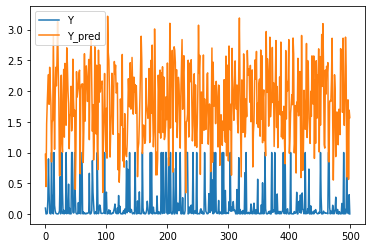

In [22]:
Y=layers(X)
plt.plot(df[df.columns[-1]][:500], label='Y')
plt.plot(Y[:500], label='Y_pred')
plt.legend()
plt.show()